In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [12]:
def load_pickle(path):
    with open(path, 'rb') as fp:
        _ = pickle.load(fp)
    return {'p':_[0], 'r':_[1], 'f':_[2]}
    
def plot_global_metrics(res1,res2,res3):
    # examples : 
    #mobileNetV1_split_random_caped_labels_300 = {'p':0.784, 'r':0.56, 'f':0.653}
    #mobileNetV1_caped_labels_100 = {'p':0.831,'r':0.754,'f':0.791}
    labels = ['Precision', 'Recall', 'F1-Score']
    # print(list(res1.values()))
    # print(list(res2.values()))    
    res1_values = list(res1.values())
    res2_values = list(res2.values())
    res3_values = list(res3.values())

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, res1_values, width, label='cap300v2')
    rects2 = ax.bar(x, res2_values, width, label='filled1000v0')
    rects3 = ax.bar(x + width/2, res3_values, width, label='iNat1000v0')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('F1-Score')
    ax.set_title('MobileNetV1-YOLOv2 cap300v2 vs filled1000v0 vs iNat1000v0')
    ax.set_xticks(x, labels)
    ax.legend(loc=3)

    ax.bar_label(rects1, padding=0)
    ax.bar_label(rects2, padding=0)
    ax.bar_label(rects3, padding=0)

    #fig.tight_layout()
    plt.savefig("../../data/imgs/img_plot/iNat_comparaisons/cap300v2_filled1000v0_iNat1000v0",bbox_inches='tight',dpi=100)   

    plt.show()

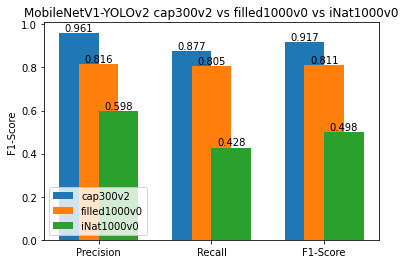

In [13]:
file1 = load_pickle("../../data/pickles/data_augmentation/MobileNet_caped_300_data_aug_v2/P_R_F1_global_MobileNet_input_test.p")
file2 = load_pickle("../../data/pickles/MobileNet_caped1000_data_aug_v0_filled_iNat/P_R_F1_global_MobileNet_input_test.p")
file3 = load_pickle("../../data/pickles/iNat1000/MobileNet_iNat1000_v0/P_R_F1_global_MobileNet_input_test.p")

plot_global_metrics(file1,file2,file3)